# Imports


In [48]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
from typing import List, Callable, Dict

# Basic Functions

In [49]:
def square(x):
    return np.power(x, 2)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1+np.exp(-x))

# A function to calculate deriv
def deriv(func: Callable[[ndarray], ndarray], input_: ndarray, diff: float = 0.001) -> ndarray:
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

Plot

Text(0, 0.5, 'output')

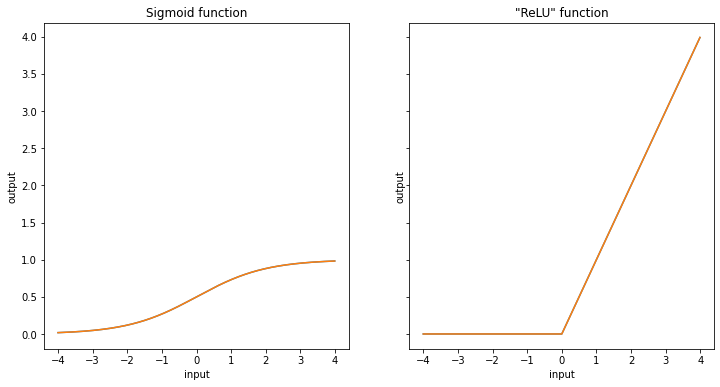

In [50]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-4,4, 0.01)
ax[0].plot(input_range, sigmoid(input_range))
ax[0].plot(input_range, sigmoid(input_range))
ax[0].set_title('Sigmoid function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, relu(input_range))
ax[1].plot(input_range, relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

# Chain

In [51]:
# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of function
Chain = List[Array_Function]

In [52]:
def chain_length_2(chain: Chain, x: ndarray) -> ndarray:

    # 'Evaluate two function in a row in a chain'
    assert len(chain) == 2

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

## Chain Deriv

In [53]:
def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    # Uses chain rule (f2(f1(x))' = f2'(f1(x)) * f1'(x)

    assert len(chain) == 2

    assert input_range.ndim == 1

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    df1dx = deriv(f1,input_range)

    # df2/dx
    df2du = deriv(f2,f1(input_range))

    return df1dx * df2du

In [54]:
def plot_chain(ax, chain: Chain, input_range: ndarray, length: int = 2) -> ndarray:

    assert input_range.ndim == 1

    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)


def plot_chain_deriv(ax, chain: Chain, input_range: ndarray, length: int = 2) -> ndarray:

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)


**Example**

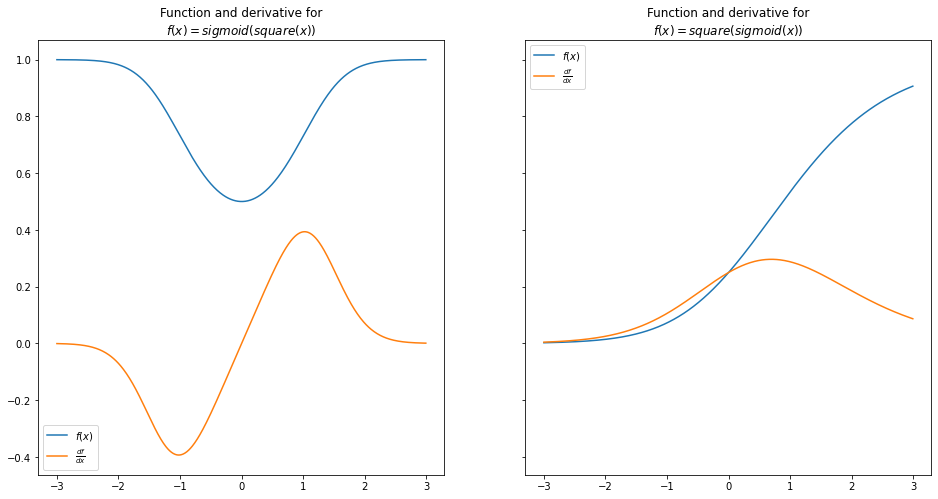

In [55]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

# Chain of length 3

In [56]:
def chain_length_3(chain:Chain,x:ndarray) -> ndarray:

    # Evaluates three functions in a row, in a "Chain".
    assert len(chain) == 3


    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

def chain_deriv_3(chain:Chain,input_range:ndarray) -> ndarray:

    #Uses the chain rule to compute the derivative of three nested functions:
    # (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)

    assert len(chain) == 3

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3,f2_of_x)

    # df2du
    df2du = deriv(f2,f1_of_x)

    # df1dx
    df1dx = deriv(f1,input_range)

    return df1dx * df2du * df3du


**Plot**

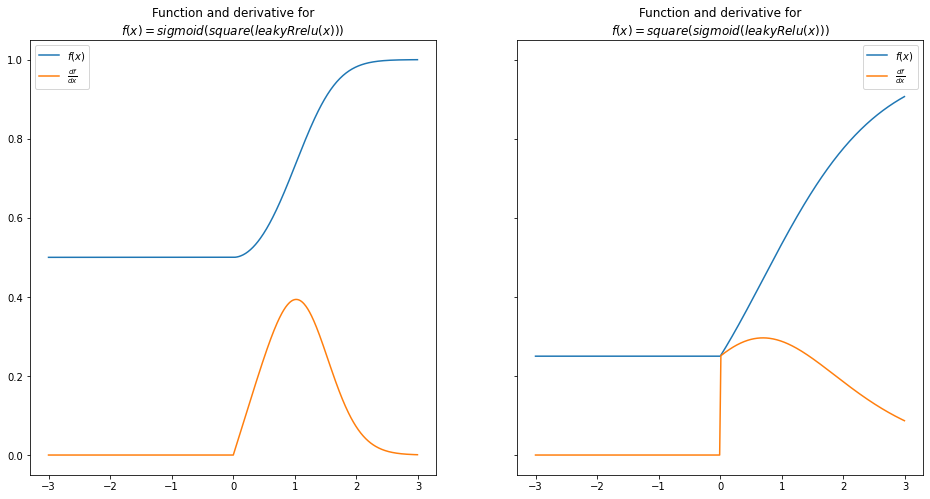

In [57]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [relu, square, sigmoid]
chain_2 = [relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

# plt.savefig(IMG_FOLDER_PATH + "09_plot_chain_rule_2.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "09_plot_chain_rule_2.pdf");

# Function with multiple inputs

In [ ]:
def multiple_inputs_add(x: ndarray, y: ndarray, sigma: Array_Function) -> float:

    # forward pass

    assert x.shape == y.shape

    a = x + y
    return sigma(a)


def multiple_inputs_add_backward(x:ndarray,y:ndarray,sigma:Array_Function) -> float:

    # Computes the derivative of this simple function with respect to both inputs

    a = x + y

    dsda = deriv(sigma,a)

    dadx,dady = 1,1

    return dsda * dadx, dsda * dady

# Function with matrix multiplication

In [58]:
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:

    # Computes the forward pass of a matrix multiplication

    assert X.shape[1] == W.shape[0]

    return np.dot(X, W)

In [59]:
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:

    # X =[x1,x2,x3,x4,x5]
    # w= [w1
    #     w2
    #     w3]
    # N = X.W =  [x1 * w1 , x2 * w2 ,x3 * w3]
    # And looking at this, we can see that if
    # for example, x1 changes by ϵ units, then N will change by w1 × ϵ units

    # dN/dX = [w1,w2,w3,w4,w5]

    # dN/dX = transpose of W

    dNdX = np.transpose(W, (1, 0))
    return dNdX

In [60]:
# Example
X = np.random.randn(1, 3)
W = np.random.randn(3, 1)

print(W)
print(matmul_backward_first(X, W))

[[ 0.01270208]
 [-0.2315007 ]
 [-0.71488677]]
[[ 0.01270208 -0.2315007  -0.71488677]]


In [ ]:
def matrix_forward_extra(X:ndarray,W:ndarray,sigma:Array_Function) -> ndarray:

    assert X.shape[1] == W.shape[0]
    
    N = np.dot(X,W)

    S = sigma(N)
    
    return S

# Derivation of a function with matrix multiplication

In [62]:
def matrix_function_backward_1(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:

    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)

    S = sigma(N)

    dSdN = deriv(sigma, N)

    dNdX = np.transpose(W, (1, 0))

    return np.dot(dSdN, dNdX)


In [63]:
# Example
print(matrix_function_backward_1(X,W,sigmoid))

[[ 0.00171588 -0.03127259 -0.09657145]]


# Matrix Function with Sum


In [ ]:
def matrix_function_forward_sum(X: ndarray, W: ndarray, sigma: Array_Function) -> float:

    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)

    S = sigma(N)

    L = np.sum(S)

    return L


def matrix_function_backward_sum_1(X: ndarray, W: ndarray, sigma: Array_Function) -> ndarray:

    # Compute derivative of matrix function with a sum with respect to the first matrix input

    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)

    S = sigma(N)

    L = np.sum(S)

    dLdS = np.ones_like(S)

    dSdN = deriv(sigma, N)

    dLdN = dLdS * dSdN

    dNdX = np.transpose(W, (1, 0))

    dLdX = np.dot(dSdN, dNdX)

    return dLdX